<a href="https://colab.research.google.com/github/Rajalaxmi2002/ADBMS/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

(150,)

Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.9473684210526315
Accuracy on train data using entropy 0.9642857142857143
Accuracy on test data using entropy 0.9473684210526315


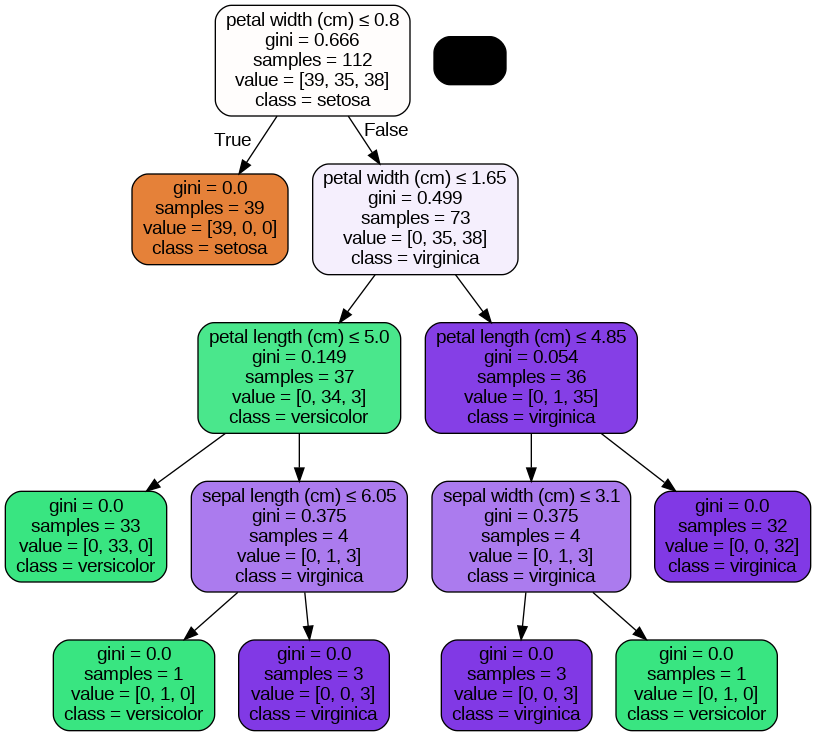

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#load iris data

data = load_iris()
data.data.shape
print('classes to predict: ',data.target_names)
print('Features: ',data.feature_names)

X = data.data
y = data.target

display (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)

#default criterion is Gini

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#change criterion to entropy

classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)

print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy))

#change criterion to entropy with min_samples_split to 50. Default value is 2

classifier_entropy1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
classifier_entropy1.fit(X_train, y_train)
y_pred_entropy1 = classifier_entropy1.predict(X_test)

print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy1.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy1))

#visualise the decision tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

#the students can try using classifier, classifier_entropy and classifier_entropy1

#as first parameter below.

export_graphviz(classifier, out_file = dot_data,filled = True, rounded = True,special_characters = True, feature_names = data.feature_names, class_names = data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())